In [8]:
import numpy as np
from scipy.ndimage.interpolation import shift
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

np.random.seed(42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [3]:
def fetch_mnist():
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist["data"], mnist["target"]
    y = y.astype(np.uint8)
    X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
    return X_test, X_train, y_test, y_train

In [4]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [5]:
def test_shift_image(X_train):
    image = X_train[1000]
    shifted_image_down = shift_image(image, 0, 5)
    shifted_image_left = shift_image(image, -5, 0)

    plt.figure(figsize=(12, 3))
    plt.subplot(131)
    plt.title("Original", fontsize=14)
    plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
    plt.subplot(132)
    plt.title("Shifted down", fontsize=14)
    plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
    plt.subplot(133)
    plt.title("Shifted left", fontsize=14)
    plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
    plt.show()

In [10]:
X_test, X_train, y_test, y_train = fetch_mnist()

In [6]:
def run_ex_0301():    
    test_shift_image(X_train)
   

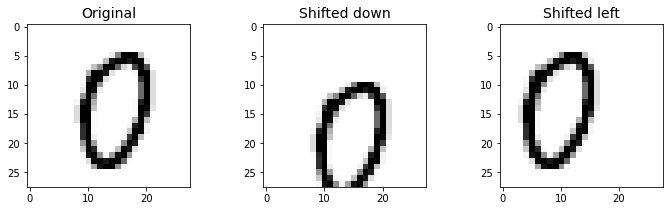

In [9]:
run_ex_0301()

In [11]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [12]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [16]:
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')

In [17]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [18]:
y_pred = knn_clf.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.9763